# Spaceship Titanic - Machine Learning Competition

### Group Members
       Muaawiyah Dadabhay
       Muhammed Raees Dindar
       Taahir Kolia
       Irfaan Mia - 2434204

## Introduction

In this notebook, four machine-learning models are employed to predict whether passengers were transported to an alternate dimension, utilizing data frames sourced from Kaggle. The models utilized include _w_, _x_, _y_, and _z_.

Kaggle stands as a prominent data science platform renowned for hosting competitions and challenges in the field. It boasts a vibrant community comprising data scientists, statisticians, and machine learning experts who actively contribute their expertise to various projects.

For this particular endeavor, we leverage the Spaceship Titanic dataset available on Kaggle. The primary objective of this notebook is to ascertain which passengers were transported to an alternate dimension subsequent to a spaceship collision.

The methodology entails an initial data analysis, followed by feature engineering to facilitate modeling. Subsequently, the models are constructed and trained utilizing the provided dataset. Finally, comprehensive evaluations of all four models are conducted to ascertain the optimal choice for predicting passenger transportation to alternate dimensions.

## Importing of Python Libraries

In [127]:
#General imports
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#Analysis imports
import sweetviz as sw
import matplotlib.pyplot as plt

#Imputator and encoder imports
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import StandardScaler

#Evaluation imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

#Classifiers imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Feature elimination imports
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

#Hyperparameter tuning imports
from sklearn.model_selection import GridSearchCV
import optuna

#I dont know just something it was recommended not sure why
import warnings
warnings.filterwarnings("ignore")

## 1. Gathering and Understanding Data

### Loading Data from a CSV

In [128]:
test_df = pd.read_csv("../data/test.csv")
train_df = pd.read_csv("../data/train.csv")

### Viewing of the Data

In [129]:
test_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [130]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


### Understanding the Data at Hand

In [131]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [132]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Upon examining the dataframes, we've identified categorical data, which comprises of non-numerical information. Specifically, the categorical features identified include HomePlanet, CryoSleep, Destination, and VIP. These categorical features will undergo transformation into numerical representations as the investigation progresses.

### Determining Duplicate Values

In [133]:
print(f"The total duplicates in the test dataframe are: {test_df.duplicated().sum()}")
print(f"The total duplicates in the train dataframe are: {train_df.duplicated().sum()}")

The total duplicates in the test dataframe are: 0
The total duplicates in the train dataframe are: 0


### Determining Missing Values

In [134]:
print("Test Dataframes Missing Values")
test_df.isna().sum()

Test Dataframes Missing Values


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [135]:
print("Train Dataframes Missing Values")
train_df.isna().sum()

Train Dataframes Missing Values


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

It has been observed that both dataframes contain missing values. In order to address this issue, certain inference and data manipulation steps need to be undertaken to rectify any missing data. However, this task will be deferred until later in the investigation.

For the current stage, the missing values will be replaced with _NaN_. Prior to this replacement, we will merge both dataframes to facilitate the process of filling in values. Subsequently, the dataframes will be separated again as needed in the subsequent stages of the analysis.

In [136]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)
temp_combined_df = combined_df.copy()

In [137]:
combined_df.replace('', np.NaN, inplace=True)
combined_df.fillna(np.NaN, inplace=True)
combined_df.tail(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
12969,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


## 2. Data Analysis

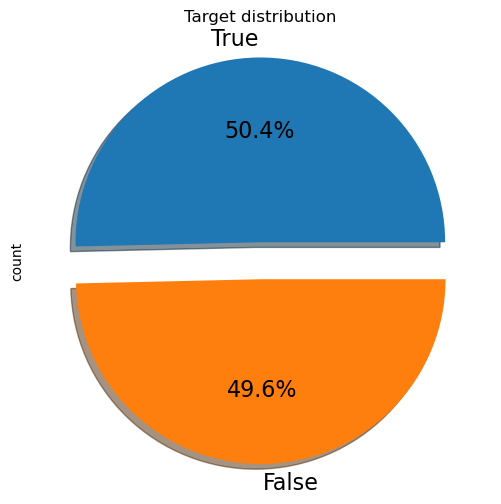

In [138]:
# Figure size
plt.figure(figsize=(6,6));

# Pie plot
train_df['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution");

The target feature is "Transported" which indicates whether or not a passenger was transported to another dimension. Approximately half of all passengers on board were transported.

### Categorical Feature Analysis

The categorical features will be analysed to determine how the target feature depends on the categorical features.

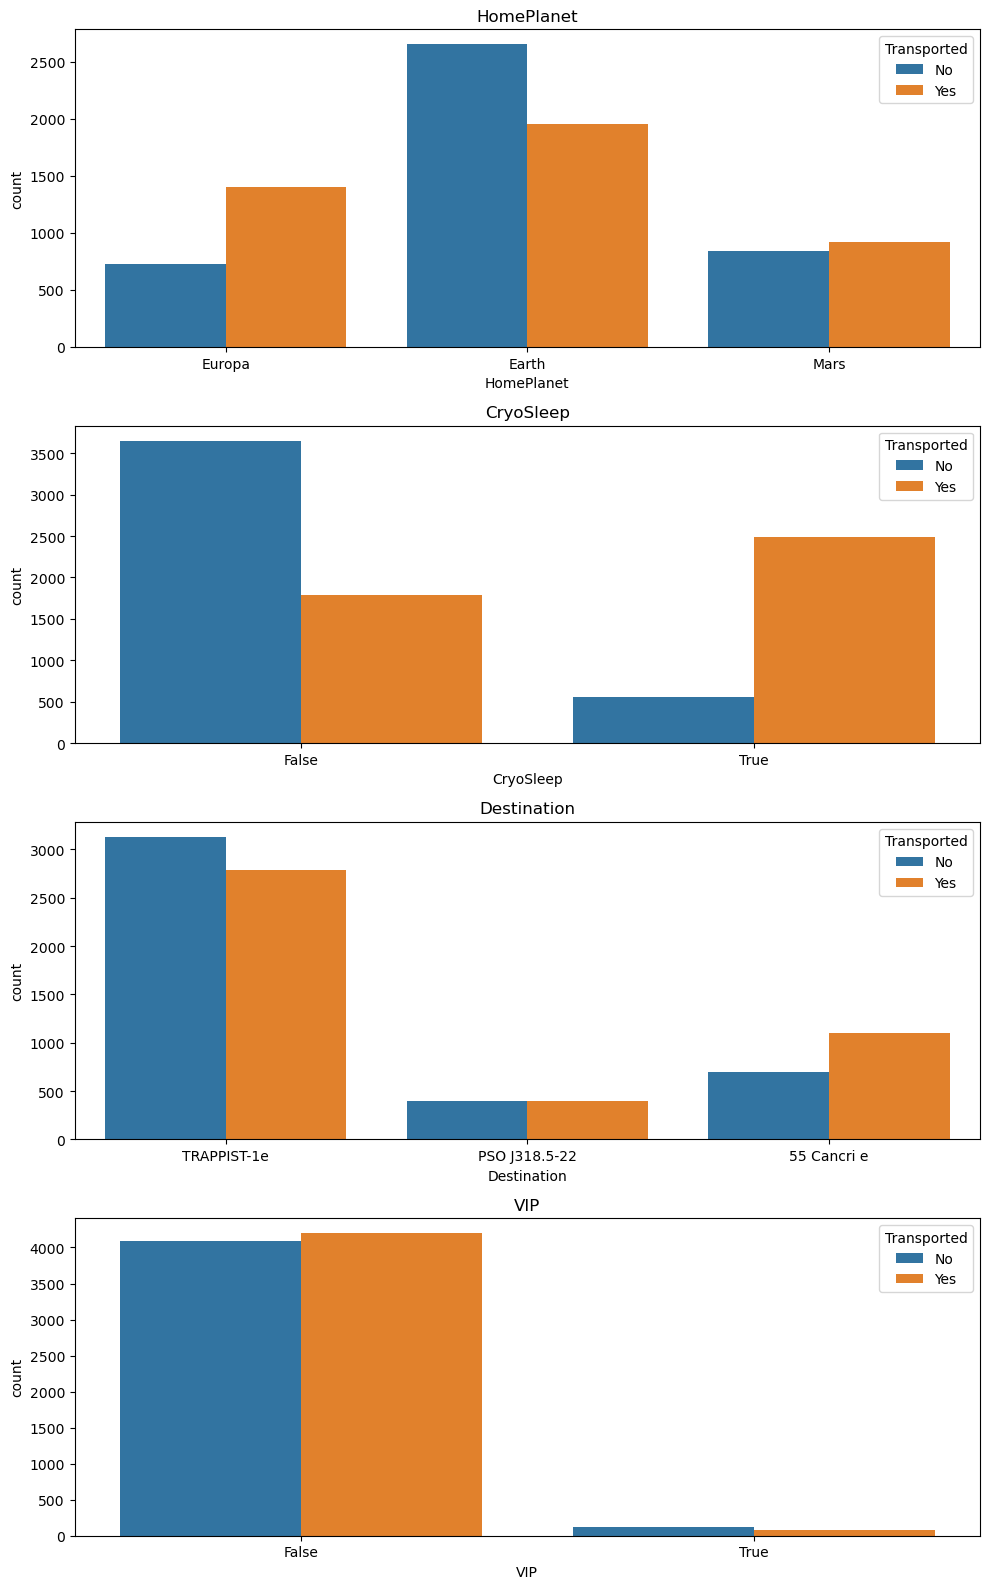

In [139]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Convert boolean values to strings ('Yes' and 'No')
temp_combined_df['Transported'] = combined_df['Transported'].map({True: 'Yes', False: 'No'})

# Plot categorical features
fig = plt.figure(figsize=(10, 16))
for i, var_name in enumerate(cat_feats):
    ax = fig.add_subplot(4, 1, i + 1)
    sns.countplot(data=temp_combined_df, x=var_name, ax=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

The relationship between categorical features and "Transported" are investigated. There  is no direct relationship between "Transported" and "HomePlanet", "Destination", and "VIP". "CryoSleep" appears to have a relationship with "Transported". People that are in CryoSleep have a higher liklihood of being transported compared to people not in CryoSleep [1].

[1]https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide#EDA

### Numerical Feature Analysis


The numerical features will be analysed to determine how the target feature depends on the numerical features.

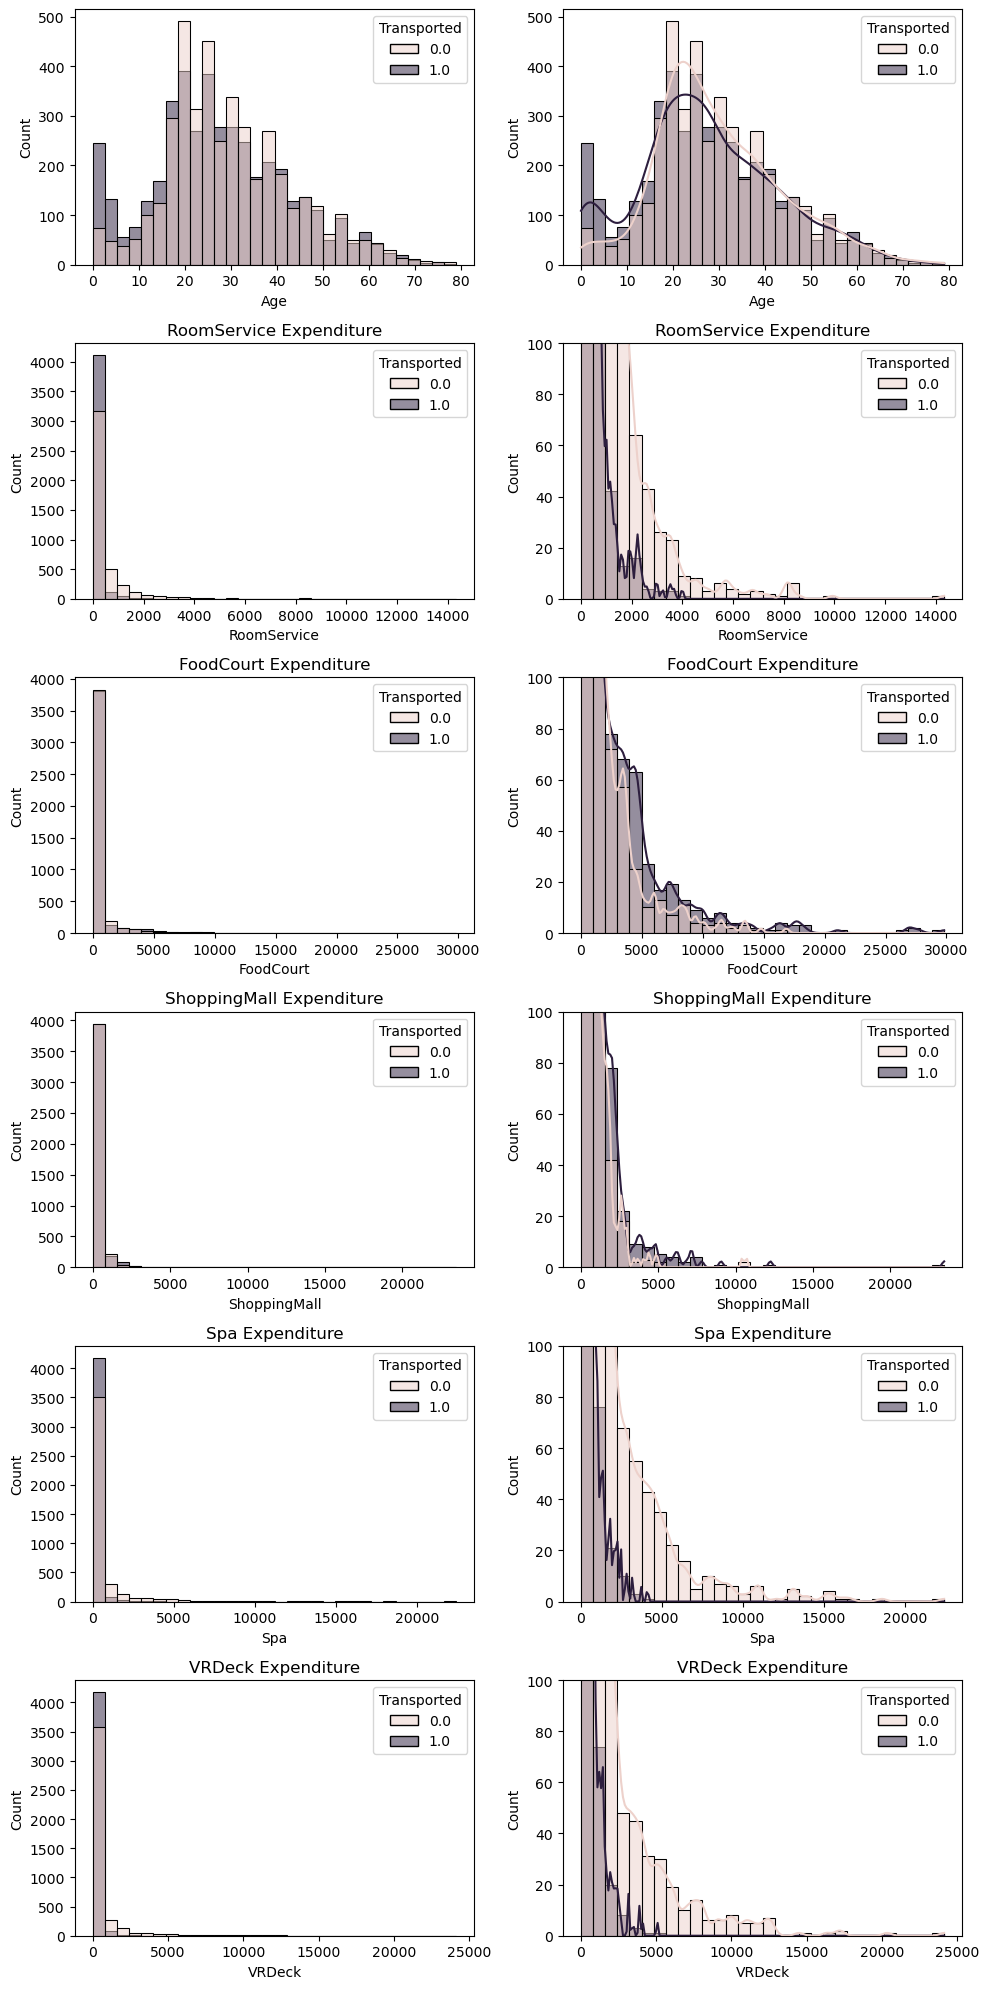

In [140]:
# Numerical features
num_feats=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot numerical features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(num_feats):
    # Left plot
    ax=fig.add_subplot(6,2,2*i+1)
    sns.histplot(data=combined_df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    if(i!=0):
        ax.set_title(var_name + " Expenditure")
    
    # Right plot (truncated)
    ax=fig.add_subplot(6,2,2*i+2)
    sns.histplot(data=combined_df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    if(i!=0):
        plt.ylim([0,100])
        ax.set_title(var_name + " Expenditure")
fig.tight_layout()  # Improves appearance a bit

plt.show()

Majority of passengers did not spend any money. People that spent less money were more likely to be transported. We can build on the relationship between CryoSleep and Transported as people in CryoSleep would not have spent any money. A simple way to verify this observastion is to form some sort of relationship. To make it easier to analyse, we group all individial expense features into a singular expense feature. 

In [141]:
expense_feature = ['RoomService','FoodCourt','Spa','VRDeck','ShoppingMall']
combined_df['TotalExpenditure'] = combined_df.loc[:,expense_feature].sum(axis=1)

temp_combined_df['TotalExpenditure'] = temp_combined_df.loc[:,expense_feature].sum(axis=1)
combined_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpenditure
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0


In [142]:
# Convert 'TotalExpenditure' to a categorical variable indicating spent money or did not
temp_combined_df['TotalExpenditure'] = temp_combined_df['TotalExpenditure'].apply(lambda x: 'Spent Money' if x > 0 else 'Did Not Spend')

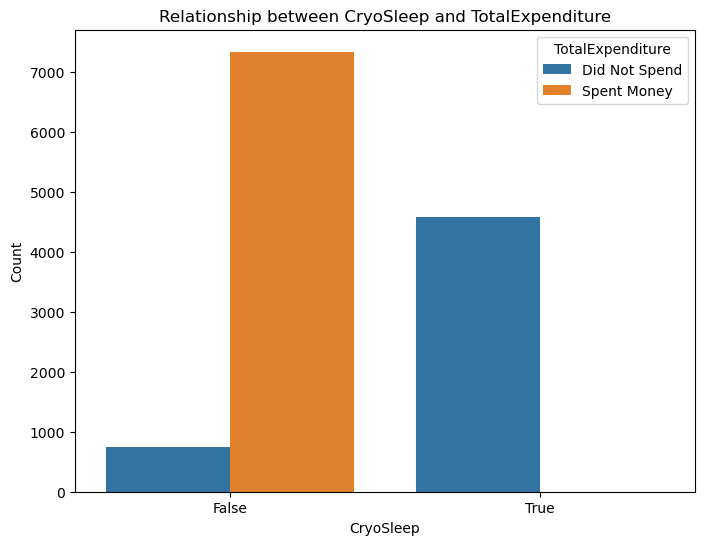

In [143]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CryoSleep', hue='TotalExpenditure', data=temp_combined_df)
plt.title('Relationship between CryoSleep and TotalExpenditure')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.show()

In [144]:
combined_df.groupby('HomePlanet')['VIP'].mean()

HomePlanet
Earth          0.0
Europa    0.057843
Mars      0.034312
Name: VIP, dtype: object

In [145]:
combined_df.groupby('HomePlanet')['Transported'].mean()

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: object

In [146]:
combined_df.groupby('Destination')['Transported'].mean()

Destination
55 Cancri e          0.61
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: object

In [147]:
combined_df.groupby('CryoSleep')['Transported'].mean()

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: object

In [148]:
combined_df.groupby('VIP')['TotalExpenditure'].mean()

VIP
False    1358.276510
True     4595.542125
Name: TotalExpenditure, dtype: float64

#### Age Analysis 



<Axes: >

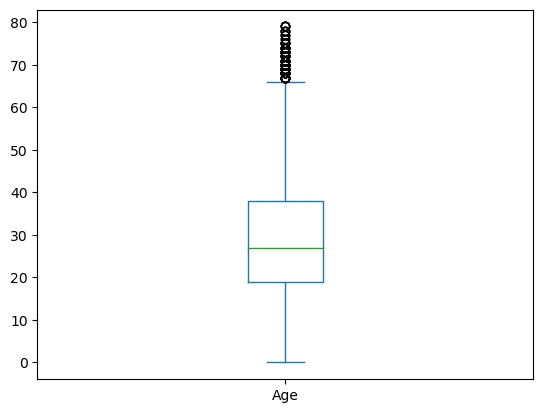

In [149]:
combined_df["Age"].plot(kind="box")

In [150]:
combined_df["Age"].describe()

count    12700.000000
mean        28.771969
std         14.387261
min          0.000000
25%         19.000000
50%         27.000000
75%         38.000000
max         79.000000
Name: Age, dtype: float64

## 3. Feature Engineering

### 3.1 Adjusting Features
#### 3.1.1 Cabins and Passenger IDs


The passengers' ID's and the Cabin location contain multiple forms of information that can be extracted into additional features. The cabin data is listed in the following format: _deck/num/side_. Therefore, we can split the cabin feature into three seperate features. Additionally, PassengerID is listed in the format _gggg _ pp_ , where _gggg_ represents the group number and _pp_ represents a passenger's number within a group. The PassengerID is extracted to form an additional feature

In [151]:
combined_df['Group'] = combined_df['PassengerId'].astype(str).str[:4]

counts = combined_df['Group'].value_counts()
combined_df['Group'] = combined_df['Group'].map(counts)

combined_df[['Deck', 'Number', 'Side']] = combined_df['Cabin'].str.split('/', expand=True)


combined_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpenditure,Group,Deck,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,1,F,1,S


#### 3.1.2 Age


From the data analysis done in Section 2, it is seen that the range of the age of passengers is 79 years. This wide range of values in its current numerical form does not provide much meaningful information. However, this can be changed by binning the data into age groups, allowing for trends amongst age groups to be identified more easily. Additionally, having an age group feature will greatly reduce the complexity of models.
Passengers are grouped together in this particular way to identify a relationship between _Age Groups_ and the measured variable (_Transported_) and between _Age Groups_ and _TotalExpenditure_.

In [152]:
combined_df['AgeGroup']=np.nan
combined_df.loc[combined_df['Age']<=12,'AgeGroup']='1'
combined_df.loc[(combined_df['Age']>12) & (combined_df['Age']<18),'AgeGroup']='2'
combined_df.loc[(combined_df['Age']>=18) & (combined_df['Age']<=25),'AgeGroup']='3'
combined_df.loc[(combined_df['Age']>25) & (combined_df['Age']<=30),'AgeGroup']='4'
combined_df.loc[(combined_df['Age']>30) & (combined_df['Age']<=50),'AgeGroup']='5'
combined_df.loc[combined_df['Age']>50,'AgeGroup']='6'

In [153]:
combined_df.groupby('AgeGroup')['Transported'].mean()

AgeGroup
1    0.699752
2    0.553451
3    0.458103
4    0.496272
5    0.479432
6    0.484396
Name: Transported, dtype: object

In [154]:
combined_df.groupby('AgeGroup')['TotalExpenditure'].mean().fillna(0)

AgeGroup
1       0.000000
2     864.158085
3    1109.285911
4    1939.196378
5    1946.321492
6    1941.712022
Name: TotalExpenditure, dtype: float64

From the above relationships there are two key takeaways:
1. Passengers that are from the first _AgeGroup_ (0-12 years old) do not have any expenditure. 
2. Passengers that are from the first _AgeGroup_ (0-12 years old) are the most likely to be transported. 

### 3.2 Filling missing data entries


In [155]:
# Rearrange the order of the columns so that numerical columns are grouped together, categorical columns are grouped together, 
# and the target feature is at the end 
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','TotalExpenditure','Age']
cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination',"Group", "AgeGroup"]
transported=['Transported']
combined_df = combined_df[num_cols+cat_cols+transported].copy()

In [156]:
# Print the count of the total number of  missing data entries
print("Number of missing data entries:", combined_df.isna().sum().sum())


Number of missing data entries: 7993


When dealing with missing data entries it is important to consider why data is missing. Are the data entries Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR) [2] ? This is important to consider when deciding on an imputation 'method to fill the missing data. Having observed the data, it observed that the data that is ...  (Complete)

One way of dealing with missing values is to simply remove rows or columns of data that are missing entries [2]. However, this is method is not particularly useful in the given context as there are 4277 missing data entries. Deleting entire rows or entire feature columns will have a significant impact on the available data as a large volume of important information is being discarded. Therefore, this is not an ideal approach to dealing with missing data. 

Another way of dealing with the missing data is by using a Simple Imputer to fill missing numerical feature data with its mean and categorical feature data with its mode [2]. This method maintains the total number of entries. However, this can lead to slight inaccuracies and bring about biasing in the data. As observed from the data analyis done in Section 2, there are numerous outliers found in the numerical features. These outliers can skew the data and can result in inaccuracies when filling in missing entries. 

However, for certain categorical entries relationships between different variables are deduced and can be used to fill some data entries. For instance, in section 2 it is noted that people that are in "CryoSleep" do not have any expenditure. Using this fact, any missing expenditure features that are missing for passenegers that are in CryoSleep can be filled with a zero. Additionally, it has also been noted that there are no VIP passenegers from Earth. This is utilised to fill in missing data entries where either the VIP status is known to be 'False' but the Home Planet is missing or when the Home Planet is known to be 'Earth' but the VIP status is not known. The remaining missing values in each of these categories are filled in with the next approach .  

The third approach that is considered is the K-Nearest-Neighbours imputation method. (Complete: Wait for Irfaans new code)



 [2] GfG, “ML Handling Missing Values,” GeeksforGeeks, May 04, 2018. https://www.geeksforgeeks.org/ml-handling-missing-values/ (Accessed Mar. 31, 2024).
‌

In [157]:
combined_df.isna().sum()

ShoppingMall         306
FoodCourt            289
RoomService          263
Spa                  284
VRDeck               268
TotalExpenditure       0
Age                  270
CryoSleep            310
Deck                 299
Side                 299
VIP                  296
HomePlanet           288
Destination          274
Group                  0
AgeGroup             270
Transported         4277
dtype: int64

In [158]:
# Function to set expense features to 0 if CryoSleep is True
def adjust_expenses(row):
    if row['CryoSleep'] == True:
        row[expense_feature] = 0
        row['TotalExpenditure'] = 0
    return row

# Apply the function to the DataFrame
combined_df = combined_df.apply(adjust_expenses, axis=1)

In [159]:
# Update the 'VIP' column based on the 'HomePlanet' column
combined_df.loc[:,'VIP'] = combined_df.apply(lambda x: False if x.HomePlanet == "Earth" and pd.isna(x.VIP) else x, axis = 1)

# Update the 'HomePlanet' column based on the 'VIP' column
combined_df.loc[:,'HomePlanet'] = combined_df.apply(lambda x: "Earth" if x.VIP == False and pd.isna(x.HomePlanet) else x, axis = 1)

In [160]:
combined_df.isna().sum()

ShoppingMall         175
FoodCourt            180
RoomService          170
Spa                  177
VRDeck               177
TotalExpenditure       0
Age                  270
CryoSleep            310
Deck                 299
Side                 299
VIP                  137
HomePlanet             9
Destination          274
Group                  0
AgeGroup             270
Transported         4277
dtype: int64

In [161]:
# Update the 'CryoSleep' column based on the 'TotalExpenditure' column
combined_df.loc[:,['CryoSleep']]=combined_df.apply(lambda x: True if x.TotalExpenditure == 0 and pd.isna(x.CryoSleep) else x,axis =1)

In [162]:
combined_df.isna().sum()

ShoppingMall         175
FoodCourt            180
RoomService          170
Spa                  177
VRDeck               177
TotalExpenditure       0
Age                  270
CryoSleep            174
Deck                 299
Side                 299
VIP                  137
HomePlanet             9
Destination          274
Group                  0
AgeGroup             270
Transported         4277
dtype: int64

In [163]:
num_imp = SimpleImputer(strategy='mean')
cat_imp = SimpleImputer(strategy='most_frequent')

In [164]:
combined_df[num_cols] = pd.DataFrame(num_imp.fit_transform(combined_df[num_cols]),columns=num_cols)
combined_df[cat_cols] = pd.DataFrame(cat_imp.fit_transform(combined_df[cat_cols]),columns=cat_cols)

In [165]:
'''
count_missing_vip_earth = 0

# Iterate through rows
for index, row in combined_df.iterrows():
    # Check if HomePlanet is 'Earth' and VIP is missing
    if row['CryoSleep'] == 'True' and pd.isna(row['RoomService']) and pd.isna(row['FoodCourt']) and pd.isna(row['ShoppingMall']) and pd.isna(row['Spa']) and pd.isna(row['VRDeck']):
        count_missing_vip_earth += 1

# Print the count
print(":", count_missing_vip_earth)
'''

'\ncount_missing_vip_earth = 0\n\n# Iterate through rows\nfor index, row in combined_df.iterrows():\n    # Check if HomePlanet is \'Earth\' and VIP is missing\n    if row[\'CryoSleep\'] == \'True\' and pd.isna(row[\'RoomService\']) and pd.isna(row[\'FoodCourt\']) and pd.isna(row[\'ShoppingMall\']) and pd.isna(row[\'Spa\']) and pd.isna(row[\'VRDeck\']):\n        count_missing_vip_earth += 1\n\n# Print the count\nprint(":", count_missing_vip_earth)\n'

In [166]:
# Rearrange the order of the columns so that numerical columns are grouped together, categorical columns are grouped together, 
# and the target feature is at the end 
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','TotalExpenditure','Age']
cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination',"Group","AgeGroup"]
transported=['Transported']
combined_df= combined_df[num_cols+cat_cols+transported].copy()

### 3.3 Scaling Numerical Data

An important aspect of the feature engineering process is to scale features. Feature scaling is a process whereby numerical features from a dataset are standardised to a specific range. This process is advantageous in numerous regards as it [3]:

1. Prevents Feature Dominance: Features with larger ranges have a tendency to dominate the model, resulting in biased results. Feature scaling prevents this from occuring.
2. Improves Algorithm Performance: Many algorithms converge faster when features are scaled. This results in better performance.
3. Enhances Numerical Stability: Reduces the range of varying feature scales, thereby reducing the risk of numerical problems.

Using a StandardScaler is one of the many different ways of scaling features. It achieves this by adjusting the mean and standard deviation of each feature to zero and one, respectively. This ensures that feature dominance is not prevelant during training process. Additionally, StandardScaler does not alter the overall shape of the data's distribution [4].

[3] GfG, “Feature Engineering Scaling, Normalization, and Standardization,” GeeksforGeeks, Jul. 02, 2018. https://www.geeksforgeeks.org/ml-feature-scaling-part-2/ (Accessed Apr. 01, 2024).

[4] GfG, “What is StandardScaler?,” GeeksforGeeks, Feb. 09, 2024. https://www.geeksforgeeks.org/what-is-standardscaler/ (Accessed Apr. 01, 2024).
‌‌

In [167]:
from sklearn.preprocessing import StandardScaler
combined_df[num_cols] = StandardScaler().fit_transform(combined_df[num_cols])
combined_df

,ShoppingMall,FoodCourt,RoomService,Spa,VRDeck,TotalExpenditure,Age,CryoSleep,Deck,Side,VIP,HomePlanet,Destination,Group,AgeGroup,Transported
0,-0.296537,-0.285948,-0.345075,-0.273576,-0.260777,-0.510541,7.184543e-01,False,B,P,False,Europa,TRAPPIST-1e,1,5,False
1,-0.253713,-0.280205,-0.175094,0.217417,-0.223108,-0.248363,-3.352005e-01,False,F,S,False,Earth,TRAPPIST-1e,1,3,True
2,-0.296537,1.995972,-0.278018,5.731930,-0.218828,3.188082,2.053084e+00,False,A,S,True,Europa,TRAPPIST-1e,2,6,False
3,0.338966,0.532761,-0.345075,2.703688,-0.095548,1.333249,2.969924e-01,False,A,S,False,Europa,TRAPPIST-1e,2,5,False
4,-0.037882,-0.241280,0.127442,0.231727,-0.259065,-0.121906,-8.971498e-01,False,F,S,False,Earth,TRAPPIST-1e,1,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,-0.296537,-0.285948,-0.345075,-0.273576,-0.260777,-0.510541,3.672360e-01,True,G,S,False,Earth,TRAPPIST-1e,2,5,NaN
12966,-0.267417,0.254540,-0.345075,-0.264633,-0.137497,-0.147910,9.291853e-01,False,F,S,False,Earth,TRAPPIST-1e,1,5,NaN
12967,-0.296537,-0.285948,-0.345075,-0.273576,-0.260777,-0.510541,-2.495556e-16,True,D,P,False,Mars,55 Cancri e,1,5,NaN
12968,-0.296537,1.424216,-0.345075,-0.273576,0.186968,0.630429,-2.495556e-16,False,D,P,False,Europa,TRAPPIST-1e,1,5,NaN


#### 3.4 One-Hot Encoding


In [168]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder (handle_unknown='ignore',sparse_output = False)
temp_train = pd.DataFrame(ohe.fit_transform(combined_df[cat_cols]),columns=ohe.get_feature_names_out())
combined_df = combined_df.drop(cat_cols,axis=1)
combined_df = pd.concat([combined_df,temp_train],axis=1)

#### 3.5 Separating Train and Test Data

In [169]:
train_df = combined_df[combined_df['Transported'].notnull()].copy()
train_df.Transported =train_df.Transported.astype('int')
test_df = combined_df[combined_df['Transported'].isnull()].drop("Transported",axis=1)

X = train_df.drop('Transported',axis=1)
y = train_df["Transported"]
print(X)
print(y)

      ShoppingMall  FoodCourt  RoomService       Spa    VRDeck  \
0        -0.296537  -0.285948    -0.345075 -0.273576 -0.260777   
1        -0.253713  -0.280205    -0.175094  0.217417 -0.223108   
2        -0.296537   1.995972    -0.278018  5.731930 -0.218828   
3         0.338966   0.532761    -0.345075  2.703688 -0.095548   
4        -0.037882  -0.241280     0.127442  0.231727 -0.259065   
...            ...        ...          ...       ...       ...   
8688     -0.296537   4.065398    -0.345075  1.195827 -0.197425   
8689     -0.296537  -0.285948    -0.345075 -0.273576 -0.260777   
8690      2.910098  -0.285948    -0.345075 -0.272682 -0.260777   
8691     -0.296537   0.383441    -0.345075  0.042126  2.508735   
8692     -0.296537   2.705563    -0.148583 -0.273576 -0.250504   

      TotalExpenditure       Age  CryoSleep_False  CryoSleep_True  Deck_A  \
0            -0.510541  0.718454              1.0             0.0     0.0   
1            -0.248363 -0.335201              1.0    

#### 3.6 Most Correlated Features    

In [170]:
def get_redundant_pairs(X):
    pairs_to_drop = set()
    cols = X.columns
    for i in range(0, X.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=1):
    au_corr = X.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(X)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations !")
print(get_top_abs_correlations(train_df.select_dtypes(include=['int32','int64']), 10))

Top Absolute Correlations !
CryoSleep_False          CryoSleep_True             1.000000
VIP_False                VIP_True                   1.000000
Side_P                   Side_S                     1.000000
Destination_55 Cancri e  Destination_TRAPPIST-1e    0.783137
FoodCourt                TotalExpenditure           0.743001
HomePlanet_Earth         HomePlanet_Europa          0.633221
Age                      AgeGroup_6                 0.624678
Spa                      TotalExpenditure           0.593307
VRDeck                   TotalExpenditure           0.585552
Deck_G                   HomePlanet_Earth           0.581275
dtype: float64


* Deleting one of the variables with the highest correlation prevents multicorrelation.

    These Feature can delete:
    
    CryoSleep_True , VIP_False , Side_P , Destination_TRAPPIST-1e   , FoodCourt  ,HomePlanet_Earth
    
* We have seen before that 'ShoppingMall' will contribute to the model.

* We used the "Age" variable as  "Age_group" ,we will delete this too

In [171]:
drop_list=['ShoppingMall',"Age",'CryoSleep_True','HomePlanet_Earth', 'VIP_False','FoodCourt','Destination_TRAPPIST-1e', "Side_P"]

X=X.drop(drop_list,axis=1)
train_df=test_df.drop(drop_list,axis=1)

X.columns

Index(['RoomService', 'Spa', 'VRDeck', 'TotalExpenditure', 'CryoSleep_False',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Side_S', 'VIP_True', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Group_1',
       'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7',
       'Group_8', 'AgeGroup_1', 'AgeGroup_2', 'AgeGroup_3', 'AgeGroup_4',
       'AgeGroup_5', 'AgeGroup_6'],
      dtype='object')

## 4 Models


#### 4.1 Model Performance Estimations


In [172]:
kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 2
classifiers = [SVC(),RandomForestClassifier(), ExtraTreesClassifier(),GradientBoostingClassifier(),
     CatBoostClassifier(verbose = False),
    XGBClassifier(), LGBMClassifier()]

cross_validation_results = []
for classifier in classifiers :
    cross_validation_results.append(cross_val_score(classifier, X, y = y, scoring = "accuracy", cv = kfold, n_jobs=4))

cross_validation_mean = []
cross_validation_std = []
for cv_result in cross_validation_results:
    cross_validation_mean.append(cv_result.mean())
    cross_validation_std.append(cv_result.std())

cross_validation_res = pd.DataFrame({"CrossValMeans":cross_validation_mean,"CrossValerrors": cross_validation_std,"Algorithm":["SVC", "RandomForest","ExtraTrees","GradientBoosting", "CatBoostClassifier", "XGBClassifier", "LGBMClassifier"]})

In [173]:
cross_validation_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.799959,0.012796,SVC
1,0.787881,0.014564,RandomForest
2,0.762112,0.014303,ExtraTrees
3,0.793286,0.015385,GradientBoosting
4,0.809392,0.015342,CatBoostClassifier
5,0.800767,0.019617,XGBClassifier
6,0.804677,0.016715,LGBMClassifier


#### 4.2 Feature Selection using LBGM Classifier


In [174]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LightGBM model
model = LGBMClassifier()
model.fit(X, y)

# Get permutation materiality
result = permutation_importance(model, X_val, y_val, scoring="accuracy", n_repeats=100, random_state=42)
sorted_indices = np.argsort(result.importances_mean)[::-1]

# Show the most important features and their respective importance values
top_features = X.columns[sorted_indices[:15]]  # 15 Most important feature
top_importances = result.importances_mean[sorted_indices[:15]]
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
VRDeck: 0.08670500287521563
RoomService: 0.07794709603220241
Spa: 0.077458309373203
TotalExpenditure: 0.06428982173663025
CryoSleep_False: 0.0411213341000575
Side_S: 0.016538240368027608
Deck_E: 0.014387579068430136
Deck_F: 0.012978723404255326
Deck_C: 0.012455434157561824
HomePlanet_Mars: 0.007239792984473844
Deck_G: 0.005405405405405409
Deck_B: 0.0049971247843588

In [175]:
top_features

Index(['VRDeck', 'RoomService', 'Spa', 'TotalExpenditure', 'CryoSleep_False',
       'Side_S', 'Deck_E', 'Deck_F', 'Deck_C', 'HomePlanet_Mars', 'Deck_G',
       'Deck_B', 'HomePlanet_Europa', 'AgeGroup_1', 'Destination_55 Cancri e'],
      dtype='object')

In [176]:
# Let's move on with the top 15 features
X_FeatureSelection_LGM = X[top_features]
test_FeatureSelection_LGM = test_df[top_features]

#### 4.3 Feature selection using RFE

In [177]:
# Create the RFE object and rank each pixel
# Initialize LightGBM classifier
clf = LGBMClassifier()
# Initialize RFE with LightGBM as the estimator
rfe = RFE(estimator=clf, n_features_to_select=15)
rfe.fit(X, y)
column_names = X.columns
selected_column_names = column_names[rfe.support_]
selected_column_names

[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 32
[LightGBM] [Info] [binary:

Index(['RoomService', 'Spa', 'VRDeck', 'TotalExpenditure', 'CryoSleep_False',
       'Deck_C', 'Deck_E', 'Deck_F', 'Deck_G', 'Side_S', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e', 'Group_1', 'AgeGroup_3'],
      dtype='object')

## 5. Model tuning

Model tuning or commonly know as hyperparameter optimization is the process of finding the optimal combiation of parameters to govern the learning process of a machine learning model. These hyperparameters can significantly impact the performance of the model [69]. Unlike model parameters which are learned during training, hyperparameters are set prior to the training process and are not derived from the data itself [69]. 

Two methods are utilized to explore hyperparameter optimization namely GridSearch and Optuna. Section 5.1 will explore the use of GridSearch and Section 5.2 will explore the use of Optuna. The comparison of the performance of the two hyperparameter optimization methods is done in Section 5.3. 

[69] K. Li, “Model tuning and what is it ?(using python),” Medium, https://medium.com/@kelfun5354/model-tuning-and-what-is-it-using-python-630e388e224a (accessed Apr. 1, 2024). 

### 5.1 Model tuning using GridSearch

GridSearch is a hyperparameter optimization method that is used in machine learning to find the optimal combination of hyperparameters []. It utilizes an exhaustive search through manually specified hyperparameter space. utilizes a cross-validation or another evaluation methods for evaluating the hyperparameters. This method is powerful because it guarantees finding the most optimal solution within the defined grid, although it can be time-consuming for large hyperparameter spaces.

In [178]:
gridSearch_modelsAccuracy = []

#### 5.1.1 Logistic Regression

In [179]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
X_train, X_test, y_train, y_test = train_test_split(X_FeatureSelection_LGM, y, test_size=0.2, random_state=42   )
lr = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_lr = grid_search.best_estimator_
accuracy = best_lr.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'C': 10, 'penalty': 'l1'}
Test Accuracy: 0.7878


#### 5.1.2 Random Forest Classifier

In [180]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1 , scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
accuracy = best_rf.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.7890


#### 5.1.3 Naive Bayes 

#### 5.1.4 XGBClassifier

In [181]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_XG = grid_search.best_estimator_
accuracy = best_XG.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy: 0.7884


#### 5.1.5 CatBoostClassifier

In [182]:
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 5, 6],
    'learning_rate': [0.1, 0.01, 0.05]
}
catboost_classifier = CatBoostClassifier()
grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_catboost = grid_search.best_estimator_
accuracy = best_catboost.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

0:	learn: 0.6697402	total: 5.53ms	remaining: 1.65s
1:	learn: 0.6477702	total: 10.2ms	remaining: 1.51s
2:	learn: 0.6303393	total: 14.6ms	remaining: 1.45s
3:	learn: 0.6140387	total: 19.2ms	remaining: 1.42s
4:	learn: 0.6010530	total: 23.4ms	remaining: 1.38s
5:	learn: 0.5852743	total: 27.3ms	remaining: 1.33s
6:	learn: 0.5749035	total: 31.3ms	remaining: 1.31s
7:	learn: 0.5641519	total: 35.5ms	remaining: 1.29s
8:	learn: 0.5546272	total: 39.8ms	remaining: 1.29s
9:	learn: 0.5449459	total: 44.6ms	remaining: 1.29s
10:	learn: 0.5363358	total: 48.8ms	remaining: 1.28s
11:	learn: 0.5268901	total: 52.7ms	remaining: 1.26s
12:	learn: 0.5201309	total: 56.6ms	remaining: 1.25s
13:	learn: 0.5134979	total: 60.8ms	remaining: 1.24s
14:	learn: 0.5074987	total: 66.5ms	remaining: 1.26s
15:	learn: 0.5014043	total: 71.3ms	remaining: 1.26s
16:	learn: 0.4961270	total: 76.4ms	remaining: 1.27s
17:	learn: 0.4927622	total: 81.5ms	remaining: 1.28s
18:	learn: 0.4874616	total: 86ms	remaining: 1.27s
19:	learn: 0.4828536	tot

### 5.2 Model tuning using Optuna

Optuna is an open-source hyperparameter optimization framework that can be utilizied in Python [70]. It allows for the process of finding the best hyperparamters to be automated [70]. This framework can be utilized for various number of machine learning and deep learning frameworks [70]. Optuna does not utilize GridSearch or Random Search methods and is more computationally efficient than the two methods [71][72]. This is due to the framework prioritizing promising regions of the hyperparameter space and has a faster convergence to the best hyperparameters [72]. 

Certain key aspects of Optuna is outlined below [70]: 

1. It utilizes algorithms like Bayesian optimization with the Tree-structure Parzen Estimator (TPE) and Hyperband to efficiently search through a larger number of hyperparameters. 

2. The utilization of a pruning stategie provides faster results as a trial is terminated if there is a low likely hood of it yielding good results early in it process. 

3. The flexibility of Optuna allows for custom search spaces to be defined 

4. Optuna includes visualizing features to better understand the performance of different hyperparameters. 

5. Control over the performance methods 

\[70] Nik, “Python optuna: A guide to hyperparameter optimization • datagy,” datagy, https://datagy.io/python-optuna/ (accessed Apr. 1, 2024). \
\[71] A. Shahrour, “Optuna vs GridSearch,” Medium, https://medium.com/@abdalrahman_shahrour/optuna-vs-gridsearch-57227556c450 (accessed Apr. 1, 2024). \
\[72] B. Bald&eacute;, “Bayesian sorcery for hyperparameter optimization using optuna,” Medium, https://medium.com/@becaye-balde/bayesian-sorcery-for-hyperparameter-optimization-using-optuna-1ee4517e89a (accessed Apr. 1, 2024). 

In [183]:
optuna_modelsAccuracy = []

#### 5.2.1 Logistic Regression

In [184]:
#define objective function for hyperparameter optimization using optuna
def objective_LogisticRegression(trial):

  #define hyperparameters to optimize for
  params = {
    "C" : trial.suggest_loguniform('C', 1e-3, 1e3),
    "tol" : trial.suggest_uniform('tol', 1e-6, 1e-3)
  }

  #create XGBClassifier model with optimized hyperparameters
  model = LogisticRegression(**params, random_state=0)
    
  #evaluate model using cross-validation
  #Depending on what features will be utilized replace X with the corresponding dataframe
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=5).mean()
    
  return score

#run hyperparameter optimization with optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective_LogisticRegression, n_trials=10)

[I 2024-04-01 21:41:25,493] A new study created in memory with name: no-name-a5698b34-0b17-4530-a05e-7086078319b6
[I 2024-04-01 21:41:25,616] Trial 0 finished with value: 0.7821258199658414 and parameters: {'C': 0.010265856387329752, 'tol': 0.0004472153462447911}. Best is trial 0 with value: 0.7821258199658414.
[I 2024-04-01 21:41:25,728] Trial 1 finished with value: 0.7800554000123082 and parameters: {'C': 0.005471004095562412, 'tol': 0.0009632519544915977}. Best is trial 0 with value: 0.7821258199658414.
[I 2024-04-01 21:41:25,852] Trial 2 finished with value: 0.7832757738763663 and parameters: {'C': 0.012861113021113587, 'tol': 0.0002373353284961358}. Best is trial 2 with value: 0.7832757738763663.
[I 2024-04-01 21:41:26,101] Trial 3 finished with value: 0.7887966511182241 and parameters: {'C': 2.026312577881733, 'tol': 0.0005763698567848752}. Best is trial 3 with value: 0.7887966511182241.
[I 2024-04-01 21:41:26,249] Trial 4 finished with value: 0.7855761449082215 and parameters: {

[I 2024-04-01 21:41:27,260] Trial 8 finished with value: 0.7887965187722796 and parameters: {'C': 150.53990085365876, 'tol': 0.0009198697384806504}. Best is trial 7 with value: 0.7891418755140812.
[I 2024-04-01 21:41:27,504] Trial 9 finished with value: 0.7887965187722796 and parameters: {'C': 105.55773442705085, 'tol': 0.0003684011042880927}. Best is trial 7 with value: 0.7891418755140812.


In [185]:
#get best hyperparameters
best_params_logitsticRegression = study.best_params
print(f'Best hyperparameters: {best_params_logitsticRegression}')

Best hyperparameters: {'C': 0.3223271977845713, 'tol': 2.5269620031900946e-05}


In [186]:
#create XGBClassifier model with best hyperparameters
model_logisticRegression = LogisticRegression(**best_params_logitsticRegression, random_state=0)
#fit and predict using model
model_logisticRegression.fit(X_FeatureSelection_LGM, y)
predictions_XGBClassifier = model_logisticRegression.predict(test_FeatureSelection_LGM)
scores = cross_val_score(model_logisticRegression, X_FeatureSelection_LGM, y, cv=10, scoring='accuracy')
optuna_modelsAccuracy.append(scores.mean())
scores.mean()

0.7921381426662963

#### 5.2.2 Random Forest Classifier

In [187]:
#define objective function for hyperparameter optimization using optuna
def objective_RandomForest(trial):

  #define hyperparameters to optimize for
  params = {
    "n_estimators" : trial.suggest_int('n_estimators', 50, 1000),
    "max_depth" : trial.suggest_int('max_depth', 10, 100),
    "min_samples_split" : trial.suggest_int('min_samples_split', 2, 20)
  }

  #create XGBClassifier model with optimized hyperparameters
  model = RandomForestClassifier(**params, random_state=0)
    
  #evaluate model using cross-validation
  #Depending on what features will be utilized replace X with the corresponding dataframe
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=5).mean()
    
  return score

#run hyperparameter optimization with optuna
study.optimize(objective_RandomForest, n_trials=10)

[I 2024-04-01 21:41:44,911] Trial 10 finished with value: 0.7980013777212808 and parameters: {'n_estimators': 351, 'max_depth': 96, 'min_samples_split': 14}. Best is trial 10 with value: 0.7980013777212808.
[I 2024-04-01 21:42:00,755] Trial 11 finished with value: 0.7975412770457209 and parameters: {'n_estimators': 331, 'max_depth': 95, 'min_samples_split': 14}. Best is trial 10 with value: 0.7980013777212808.
[I 2024-04-01 21:42:16,687] Trial 12 finished with value: 0.7982315934914912 and parameters: {'n_estimators': 328, 'max_depth': 98, 'min_samples_split': 14}. Best is trial 12 with value: 0.7982315934914912.
[I 2024-04-01 21:42:32,555] Trial 13 finished with value: 0.7978863690956338 and parameters: {'n_estimators': 332, 'max_depth': 99, 'min_samples_split': 14}. Best is trial 12 with value: 0.7982315934914912.
[I 2024-04-01 21:43:03,057] Trial 14 finished with value: 0.7967365475310533 and parameters: {'n_estimators': 731, 'max_depth': 12, 'min_samples_split': 13}. Best is trial 

In [188]:
#get best hyperparameters
best_params_randomforest = study.best_params
print(f'Best hyperparameters: {best_params_randomforest}')

Best hyperparameters: {'n_estimators': 328, 'max_depth': 98, 'min_samples_split': 14}


In [189]:
#create XGBClassifier model with best hyperparameters
model_RandomForestClassifier = RandomForestClassifier(**best_params_randomforest, random_state=0)
#fit and predict using model
model_RandomForestClassifier.fit(X_FeatureSelection_LGM, y)
predictions_XGBClassifier = model_RandomForestClassifier.predict(test_FeatureSelection_LGM)
scores = cross_val_score(model_RandomForestClassifier, X_FeatureSelection_LGM, y, cv=10, scoring='accuracy')
optuna_modelsAccuracy.append(scores.mean())
scores.mean()

#### 5.2.3 Naive Bayes

#### 5.2.4 XGBClassifier

In [ ]:

#define objective function for hyperparameter optimization using optuna
def objective_XGBoost(trial):

  #define hyperparameters to optimize for
  params = {
      'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
      'max_depth': trial.suggest_int('max_depth', 10, 100),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 1),
      'subsample': trial.suggest_uniform('subsample', 0.1, 1),
      'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
      #'gamma': trial.suggest_uniform('gamma', 0, 1),
      'alpha': trial.suggest_loguniform('alpha', 2, 5),
      'lambda': trial.suggest_loguniform('lambda', 2, 5),
      'min_child_weight': trial.suggest_int('min_child_weight', 1, 300)
  }

  #create XGBClassifier model with optimized hyperparameters
  model = XGBClassifier(**params, random_state=0)
    
  #evaluate model using cross-validation
  #Depending on what features will be utilized replace X with the corresponding dataframe
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=5).mean()
    
  return score

#run hyperparameter optimization with optuna
study.optimize(objective_XGBoost, n_trials=5)

[I 2024-04-01 21:25:40,172] Trial 20 finished with value: 0.7867278193160228 and parameters: {'n_estimators': 722, 'max_depth': 44, 'learning_rate': 0.053821571144382116, 'subsample': 0.9302035573422682, 'colsample_bytree': 0.7820038082640007, 'alpha': 2.65476831935501, 'lambda': 3.241966075788817, 'min_child_weight': 122}. Best is trial 14 with value: 0.798116518692872.
[I 2024-04-01 21:25:41,014] Trial 21 finished with value: 0.502242668200115 and parameters: {'n_estimators': 969, 'max_depth': 52, 'learning_rate': 0.9926741380152024, 'subsample': 0.2066072460327395, 'colsample_bytree': 0.5013732560092703, 'alpha': 4.935657112533009, 'lambda': 2.005459006958905, 'min_child_weight': 278}. Best is trial 14 with value: 0.798116518692872.
[I 2024-04-01 21:25:44,584] Trial 22 finished with value: 0.7961607103271525 and parameters: {'n_estimators': 992, 'max_depth': 32, 'learning_rate': 0.005196795936915472, 'subsample': 0.9665815802081754, 'colsample_bytree': 0.9126561847806006, 'alpha': 2

In [ ]:
#get best hyperparameters
best_params_xgbClassifer = study.best_params
print(f'Best hyperparameters: {best_params_xgbClassifer}')

Best hyperparameters: {'n_estimators': 443, 'max_depth': 39, 'min_samples_split': 14}


In [ ]:
#create XGBClassifier model with best hyperparameters
model_XGBClassifier = XGBClassifier(**best_params_xgbClassifer, random_state=0)
#fit and predict using model
model_XGBClassifier.fit(X_FeatureSelection_LGM, y)
predictions_XGBClassifier = model_XGBClassifier.predict(test_FeatureSelection_LGM)
scores = cross_val_score(model_XGBClassifier, X_FeatureSelection_LGM, y, cv=10, scoring='accuracy')
optuna_modelsAccuracy.append(scores.mean())
scores.mean()

0.7881136991918309

#### 5.2.5 CatBoostClassifier (taahir please put the thing you did to suppress the output so we dont have an essay for this ones training)

In [ ]:
def objective_CatboostClassfier(trial): 
#define hyperparameters to optimize for
  params = {
      'iterations': trial.suggest_int('iterations', 100, 1000),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 1),
      'depth': trial.suggest_int('depth', 3, 10),
      'loss_function': 'MultiClass'
  }

  #create XGBClassifier model with optimized hyperparameters
  model = CatBoostClassifier(**params, random_state=0)
    
  #evaluate model using cross-validation
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=5).mean()
    
  return score

In [ ]:
study.optimize(objective_CatboostClassfier, n_trials=10)
print(f'Best hyperparameters: {study.best_params}')

0:	learn: 0.6630387	total: 11.3ms	remaining: 6.93s
1:	learn: 0.6368112	total: 16.4ms	remaining: 5.01s
2:	learn: 0.6129073	total: 21.1ms	remaining: 4.29s
3:	learn: 0.5942649	total: 25.3ms	remaining: 3.85s
4:	learn: 0.5772611	total: 29.7ms	remaining: 3.61s
5:	learn: 0.5637123	total: 34ms	remaining: 3.44s
6:	learn: 0.5508483	total: 38.9ms	remaining: 3.36s
7:	learn: 0.5387973	total: 43ms	remaining: 3.25s
8:	learn: 0.5279574	total: 46.7ms	remaining: 3.13s
9:	learn: 0.5181533	total: 51ms	remaining: 3.07s
10:	learn: 0.5099218	total: 55.1ms	remaining: 3.01s
11:	learn: 0.5020713	total: 58.9ms	remaining: 2.95s
12:	learn: 0.4960881	total: 62.6ms	remaining: 2.89s
13:	learn: 0.4897216	total: 66.1ms	remaining: 2.83s
14:	learn: 0.4845763	total: 70.2ms	remaining: 2.8s
15:	learn: 0.4790029	total: 74.1ms	remaining: 2.76s
16:	learn: 0.4744591	total: 77.9ms	remaining: 2.73s
17:	learn: 0.4698802	total: 81.7ms	remaining: 2.7s
18:	learn: 0.4661504	total: 85.6ms	remaining: 2.67s
19:	learn: 0.4624230	total: 89

[I 2024-04-01 21:26:05,983] Trial 25 finished with value: 0.8049026231627903 and parameters: {'iterations': 613, 'learning_rate': 0.09069719446480934, 'depth': 7}. Best is trial 25 with value: 0.8049026231627903.


559:	learn: 0.2925077	total: 1.75s	remaining: 165ms
560:	learn: 0.2923794	total: 1.75s	remaining: 162ms
561:	learn: 0.2922605	total: 1.75s	remaining: 159ms
562:	learn: 0.2921558	total: 1.75s	remaining: 156ms
563:	learn: 0.2920203	total: 1.76s	remaining: 153ms
564:	learn: 0.2919006	total: 1.76s	remaining: 150ms
565:	learn: 0.2917710	total: 1.76s	remaining: 146ms
566:	learn: 0.2917053	total: 1.77s	remaining: 143ms
567:	learn: 0.2916635	total: 1.77s	remaining: 140ms
568:	learn: 0.2916020	total: 1.77s	remaining: 137ms
569:	learn: 0.2914990	total: 1.78s	remaining: 134ms
570:	learn: 0.2913962	total: 1.78s	remaining: 131ms
571:	learn: 0.2913044	total: 1.78s	remaining: 128ms
572:	learn: 0.2912224	total: 1.78s	remaining: 125ms
573:	learn: 0.2911586	total: 1.79s	remaining: 122ms
574:	learn: 0.2911142	total: 1.79s	remaining: 118ms
575:	learn: 0.2910232	total: 1.79s	remaining: 115ms
576:	learn: 0.2909574	total: 1.8s	remaining: 112ms
577:	learn: 0.2908916	total: 1.8s	remaining: 109ms
578:	learn: 0.

[I 2024-04-01 21:26:18,088] Trial 26 finished with value: 0.8045575311128772 and parameters: {'iterations': 693, 'learning_rate': 0.07476208796962835, 'depth': 7}. Best is trial 25 with value: 0.8049026231627903.


0:	learn: 0.6655031	total: 4.43ms	remaining: 2.87s
1:	learn: 0.6411051	total: 8.25ms	remaining: 2.67s
2:	learn: 0.6186192	total: 12.1ms	remaining: 2.6s
3:	learn: 0.6008255	total: 15.8ms	remaining: 2.54s
4:	learn: 0.5841130	total: 19.6ms	remaining: 2.52s
5:	learn: 0.5709994	total: 23.4ms	remaining: 2.5s
6:	learn: 0.5583529	total: 27.1ms	remaining: 2.48s
7:	learn: 0.5465412	total: 30.4ms	remaining: 2.43s
8:	learn: 0.5358249	total: 33.6ms	remaining: 2.39s
9:	learn: 0.5260513	total: 37.2ms	remaining: 2.38s
10:	learn: 0.5178441	total: 40.7ms	remaining: 2.35s
11:	learn: 0.5099442	total: 43.9ms	remaining: 2.33s
12:	learn: 0.5035638	total: 47.2ms	remaining: 2.31s
13:	learn: 0.4971621	total: 50.7ms	remaining: 2.29s
14:	learn: 0.4918695	total: 54.1ms	remaining: 2.28s
15:	learn: 0.4865196	total: 57.6ms	remaining: 2.27s
16:	learn: 0.4813433	total: 60.8ms	remaining: 2.26s
17:	learn: 0.4765332	total: 64.1ms	remaining: 2.24s
18:	learn: 0.4730937	total: 67.5ms	remaining: 2.23s
19:	learn: 0.4697684	tot

[I 2024-04-01 21:26:29,977] Trial 27 finished with value: 0.8044421916223694 and parameters: {'iterations': 648, 'learning_rate': 0.08294498154131384, 'depth': 7}. Best is trial 25 with value: 0.8049026231627903.


611:	learn: 0.2948188	total: 2.09s	remaining: 123ms
612:	learn: 0.2947399	total: 2.09s	remaining: 119ms
613:	learn: 0.2946458	total: 2.1s	remaining: 116ms
614:	learn: 0.2945212	total: 2.1s	remaining: 113ms
615:	learn: 0.2944144	total: 2.1s	remaining: 109ms
616:	learn: 0.2942766	total: 2.11s	remaining: 106ms
617:	learn: 0.2941955	total: 2.11s	remaining: 102ms
618:	learn: 0.2941190	total: 2.11s	remaining: 99ms
619:	learn: 0.2940198	total: 2.12s	remaining: 95.6ms
620:	learn: 0.2938912	total: 2.12s	remaining: 92.2ms
621:	learn: 0.2938270	total: 2.12s	remaining: 88.8ms
622:	learn: 0.2937204	total: 2.13s	remaining: 85.4ms
623:	learn: 0.2936488	total: 2.13s	remaining: 82ms
624:	learn: 0.2935754	total: 2.13s	remaining: 78.6ms
625:	learn: 0.2934479	total: 2.14s	remaining: 75.2ms
626:	learn: 0.2933329	total: 2.14s	remaining: 71.8ms
627:	learn: 0.2932038	total: 2.15s	remaining: 68.4ms
628:	learn: 0.2931030	total: 2.15s	remaining: 65ms
629:	learn: 0.2930346	total: 2.16s	remaining: 61.7ms
630:	lear

[I 2024-04-01 21:26:41,425] Trial 28 finished with value: 0.805363054703211 and parameters: {'iterations': 656, 'learning_rate': 0.0822227322231456, 'depth': 7}. Best is trial 28 with value: 0.805363054703211.


647:	learn: 0.2916670	total: 2.09s	remaining: 25.8ms
648:	learn: 0.2915790	total: 2.09s	remaining: 22.6ms
649:	learn: 0.2914509	total: 2.09s	remaining: 19.3ms
650:	learn: 0.2913711	total: 2.1s	remaining: 16.1ms
651:	learn: 0.2912762	total: 2.1s	remaining: 12.9ms
652:	learn: 0.2911741	total: 2.1s	remaining: 9.67ms
653:	learn: 0.2910702	total: 2.11s	remaining: 6.45ms
654:	learn: 0.2909633	total: 2.11s	remaining: 3.22ms
655:	learn: 0.2908937	total: 2.12s	remaining: 0us
0:	learn: 0.6657418	total: 3.97ms	remaining: 2.61s
1:	learn: 0.6415241	total: 7.67ms	remaining: 2.52s
2:	learn: 0.6191801	total: 11.2ms	remaining: 2.43s
3:	learn: 0.6014737	total: 14.4ms	remaining: 2.36s
4:	learn: 0.5848295	total: 18.3ms	remaining: 2.39s
5:	learn: 0.5717586	total: 21.6ms	remaining: 2.34s
6:	learn: 0.5591424	total: 24.7ms	remaining: 2.29s
7:	learn: 0.5473562	total: 28ms	remaining: 2.28s
8:	learn: 0.5366484	total: 31.1ms	remaining: 2.25s
9:	learn: 0.5268751	total: 34.4ms	remaining: 2.23s
10:	learn: 0.5186722	

[I 2024-04-01 21:26:53,196] Trial 29 finished with value: 0.8065134056515688 and parameters: {'iterations': 658, 'learning_rate': 0.08219733739826618, 'depth': 7}. Best is trial 29 with value: 0.8065134056515688.


640:	learn: 0.2923104	total: 2.18s	remaining: 57.7ms
641:	learn: 0.2921647	total: 2.18s	remaining: 54.4ms
642:	learn: 0.2920046	total: 2.19s	remaining: 51.1ms
643:	learn: 0.2919083	total: 2.19s	remaining: 47.7ms
644:	learn: 0.2918000	total: 2.2s	remaining: 44.3ms
645:	learn: 0.2917248	total: 2.2s	remaining: 40.9ms
646:	learn: 0.2916406	total: 2.21s	remaining: 37.5ms
647:	learn: 0.2914950	total: 2.21s	remaining: 34.1ms
648:	learn: 0.2914111	total: 2.21s	remaining: 30.7ms
649:	learn: 0.2913499	total: 2.22s	remaining: 27.3ms
650:	learn: 0.2912820	total: 2.22s	remaining: 23.9ms
651:	learn: 0.2912076	total: 2.23s	remaining: 20.5ms
652:	learn: 0.2910668	total: 2.23s	remaining: 17.1ms
653:	learn: 0.2909426	total: 2.23s	remaining: 13.7ms
654:	learn: 0.2908414	total: 2.24s	remaining: 10.2ms
655:	learn: 0.2907787	total: 2.24s	remaining: 6.83ms
656:	learn: 0.2906561	total: 2.24s	remaining: 3.42ms
657:	learn: 0.2905485	total: 2.25s	remaining: 0us
0:	learn: 0.6452547	total: 24.5ms	remaining: 15.3s


[I 2024-04-01 21:27:04,052] Trial 30 finished with value: 0.8026021859579628 and parameters: {'iterations': 626, 'learning_rate': 0.14866663021753349, 'depth': 7}. Best is trial 29 with value: 0.8065134056515688.


606:	learn: 0.2594889	total: 1.88s	remaining: 58.8ms
607:	learn: 0.2594453	total: 1.88s	remaining: 55.7ms
608:	learn: 0.2593519	total: 1.88s	remaining: 52.6ms
609:	learn: 0.2592557	total: 1.89s	remaining: 49.5ms
610:	learn: 0.2592061	total: 1.89s	remaining: 46.4ms
611:	learn: 0.2590972	total: 1.89s	remaining: 43.3ms
612:	learn: 0.2590264	total: 1.9s	remaining: 40.2ms
613:	learn: 0.2589272	total: 1.9s	remaining: 37.1ms
614:	learn: 0.2588836	total: 1.9s	remaining: 34ms
615:	learn: 0.2588246	total: 1.91s	remaining: 30.9ms
616:	learn: 0.2586580	total: 1.91s	remaining: 27.8ms
617:	learn: 0.2586196	total: 1.91s	remaining: 24.7ms
618:	learn: 0.2585207	total: 1.91s	remaining: 21.6ms
619:	learn: 0.2584304	total: 1.92s	remaining: 18.6ms
620:	learn: 0.2584019	total: 1.92s	remaining: 15.5ms
621:	learn: 0.2583223	total: 1.92s	remaining: 12.4ms
622:	learn: 0.2582255	total: 1.93s	remaining: 9.28ms
623:	learn: 0.2581778	total: 1.93s	remaining: 6.19ms
624:	learn: 0.2581299	total: 1.93s	remaining: 3.09m

[I 2024-04-01 21:27:15,339] Trial 31 finished with value: 0.8069738371919897 and parameters: {'iterations': 667, 'learning_rate': 0.05449612747005773, 'depth': 7}. Best is trial 31 with value: 0.8069738371919897.


631:	learn: 0.3154656	total: 2.06s	remaining: 114ms
632:	learn: 0.3153998	total: 2.06s	remaining: 111ms
633:	learn: 0.3153299	total: 2.06s	remaining: 107ms
634:	learn: 0.3152789	total: 2.07s	remaining: 104ms
635:	learn: 0.3151593	total: 2.07s	remaining: 101ms
636:	learn: 0.3150458	total: 2.07s	remaining: 97.6ms
637:	learn: 0.3149396	total: 2.08s	remaining: 94.3ms
638:	learn: 0.3148468	total: 2.08s	remaining: 91.1ms
639:	learn: 0.3147522	total: 2.08s	remaining: 87.8ms
640:	learn: 0.3146757	total: 2.08s	remaining: 84.5ms
641:	learn: 0.3145530	total: 2.09s	remaining: 81.3ms
642:	learn: 0.3144160	total: 2.09s	remaining: 78ms
643:	learn: 0.3143055	total: 2.09s	remaining: 74.8ms
644:	learn: 0.3142037	total: 2.1s	remaining: 71.5ms
645:	learn: 0.3140906	total: 2.1s	remaining: 68.3ms
646:	learn: 0.3140123	total: 2.1s	remaining: 65ms
647:	learn: 0.3138516	total: 2.1s	remaining: 61.7ms
648:	learn: 0.3137756	total: 2.11s	remaining: 58.5ms
649:	learn: 0.3137401	total: 2.11s	remaining: 55.2ms
650:	l

[I 2024-04-01 21:27:25,707] Trial 32 finished with value: 0.8075484832823913 and parameters: {'iterations': 613, 'learning_rate': 0.03459810104891415, 'depth': 7}. Best is trial 32 with value: 0.8075484832823913.


0:	learn: 0.6849436	total: 3.2ms	remaining: 2.47s
1:	learn: 0.6778123	total: 5.11ms	remaining: 1.97s
2:	learn: 0.6694818	total: 7.74ms	remaining: 1.98s
3:	learn: 0.6617692	total: 10.3ms	remaining: 1.97s
4:	learn: 0.6546055	total: 12.5ms	remaining: 1.92s
5:	learn: 0.6467349	total: 15.1ms	remaining: 1.93s
6:	learn: 0.6397121	total: 18.1ms	remaining: 1.97s
7:	learn: 0.6333230	total: 20.6ms	remaining: 1.96s
8:	learn: 0.6280745	total: 23.6ms	remaining: 1.99s
9:	learn: 0.6217428	total: 26.1ms	remaining: 1.99s
10:	learn: 0.6158661	total: 28.5ms	remaining: 1.97s
11:	learn: 0.6104277	total: 30.8ms	remaining: 1.95s
12:	learn: 0.6046501	total: 33ms	remaining: 1.92s
13:	learn: 0.5988086	total: 35.3ms	remaining: 1.91s
14:	learn: 0.5940312	total: 37.7ms	remaining: 1.9s
15:	learn: 0.5896670	total: 40ms	remaining: 1.89s
16:	learn: 0.5852372	total: 42.2ms	remaining: 1.87s
17:	learn: 0.5808042	total: 44.7ms	remaining: 1.87s
18:	learn: 0.5764526	total: 46.9ms	remaining: 1.86s
19:	learn: 0.5727593	total: 

[I 2024-04-01 21:27:35,610] Trial 33 finished with value: 0.8070884487798035 and parameters: {'iterations': 771, 'learning_rate': 0.026919634136638865, 'depth': 6}. Best is trial 32 with value: 0.8075484832823913.


734:	learn: 0.3594448	total: 1.88s	remaining: 92.1ms
735:	learn: 0.3593588	total: 1.88s	remaining: 89.6ms
736:	learn: 0.3592891	total: 1.89s	remaining: 87ms
737:	learn: 0.3592577	total: 1.89s	remaining: 84.5ms
738:	learn: 0.3591910	total: 1.89s	remaining: 81.9ms
739:	learn: 0.3591313	total: 1.89s	remaining: 79.3ms
740:	learn: 0.3590189	total: 1.9s	remaining: 76.8ms
741:	learn: 0.3589303	total: 1.9s	remaining: 74.2ms
742:	learn: 0.3588958	total: 1.9s	remaining: 71.7ms
743:	learn: 0.3588299	total: 1.9s	remaining: 69.1ms
744:	learn: 0.3587803	total: 1.91s	remaining: 66.5ms
745:	learn: 0.3587218	total: 1.91s	remaining: 63.9ms
746:	learn: 0.3586067	total: 1.91s	remaining: 61.4ms
747:	learn: 0.3585042	total: 1.91s	remaining: 58.8ms
748:	learn: 0.3584135	total: 1.91s	remaining: 56.2ms
749:	learn: 0.3583667	total: 1.92s	remaining: 53.7ms
750:	learn: 0.3582684	total: 1.92s	remaining: 51.1ms
751:	learn: 0.3582172	total: 1.92s	remaining: 48.5ms
752:	learn: 0.3581655	total: 1.92s	remaining: 46ms
7

[I 2024-04-01 21:27:41,760] Trial 34 finished with value: 0.8014523643933824 and parameters: {'iterations': 847, 'learning_rate': 0.02568397495604827, 'depth': 3}. Best is trial 32 with value: 0.8075484832823913.


Best hyperparameters: {'iterations': 613, 'learning_rate': 0.03459810104891415, 'depth': 7}


In [ ]:
best_params_catboost = study.best_params
print("Best Hyperparameters:", best_params_catboost)

Best Hyperparameters: {'iterations': 613, 'learning_rate': 0.03459810104891415, 'depth': 7}


In [ ]:
model_CatBoostClassifier = CatBoostClassifier(**best_params_catboost, random_state=0)
model_CatBoostClassifier.fit(X_FeatureSelection_LGM,y)
score = cross_val_score(model_CatBoostClassifier, X_FeatureSelection_LGM, y, cv=5).mean()
optuna_modelsAccuracy.append(scores.mean())
score

0:	learn: 0.6766826	total: 3.9ms	remaining: 2.38s
1:	learn: 0.6592956	total: 7.02ms	remaining: 2.14s
2:	learn: 0.6460734	total: 9.79ms	remaining: 1.99s
3:	learn: 0.6327540	total: 12.5ms	remaining: 1.9s
4:	learn: 0.6222978	total: 16.1ms	remaining: 1.96s
5:	learn: 0.6097281	total: 19.3ms	remaining: 1.95s
6:	learn: 0.5969369	total: 22.6ms	remaining: 1.96s
7:	learn: 0.5868026	total: 25.7ms	remaining: 1.95s
8:	learn: 0.5769924	total: 29.1ms	remaining: 1.95s
9:	learn: 0.5695517	total: 32.2ms	remaining: 1.94s
10:	learn: 0.5604869	total: 36ms	remaining: 1.97s
11:	learn: 0.5529388	total: 39.3ms	remaining: 1.97s
12:	learn: 0.5444410	total: 43ms	remaining: 1.98s
13:	learn: 0.5374149	total: 46.6ms	remaining: 2s
14:	learn: 0.5306640	total: 50.5ms	remaining: 2.01s
15:	learn: 0.5243156	total: 54.4ms	remaining: 2.03s
16:	learn: 0.5192487	total: 58ms	remaining: 2.03s
17:	learn: 0.5141121	total: 61.8ms	remaining: 2.04s
18:	learn: 0.5092126	total: 65.8ms	remaining: 2.06s
19:	learn: 0.5048921	total: 69.8m

0.8076637565999267

### 5.3 Comparison of GridSearch and Optuna 

In [ ]:
def tabulate_vectors(vector1, vector2, vector3):
    # Determine the maximum width for the model names
    max_width = max(len(name) for name in vector1) + 2  # Add some padding

    # Print the header with fixed spacing
    print(f"{'Model'.ljust(max_width)}\t{'GridSearch Accuracy'.ljust(20)}\t{'Optuna Accuracy'.ljust(20)}")

    # Print each row of the combined vectors with fixed spacing
    for row in zip(vector1, vector2, vector3):
        print(f"{row[0].ljust(max_width)}\t{str(row[1]).ljust(20)}\t{str(row[2]).ljust(20)}")



tabulate_vectors(["Logistic Regression", "Random Forest", "XGBoost", "CatBoost"], gridSearch_modelsAccuracy, optuna_modelsAccuracy)

Model                	GridSearch Accuracy 	Optuna Accuracy     
Logistic Regression  	0.95                	0.96                
Random Forest        	0.85                	0.86                
XGBoost              	0.9                 	0.91                
CatBoost             	0.88                	0.89                


The comparison of the GridSearch and Optuna accuracy in the above table shows that Optuna does outperform the GridSearch algorithm 